In [2]:
!pip install mplfinance

     -------------------------------------- 73.1/73.1 kB 998.4 kB/s eta 0:00:00


In [323]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import matplotlib.pyplot as plt

In [533]:
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [534]:
df = data.copy()

In [535]:
df['sma_short'] = df['Close'].ewm(span=55, adjust=False).mean()
df['sma_long'] = df['Close'].ewm(span=89, adjust=False).mean()

In [536]:
sma_short = mpf.make_addplot(df['sma_short'], color='orange')
sma_long = mpf.make_addplot(df['sma_long'], color='y')

In [537]:
sma_list = [sma_short, sma_long]

D:\Anaconda\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


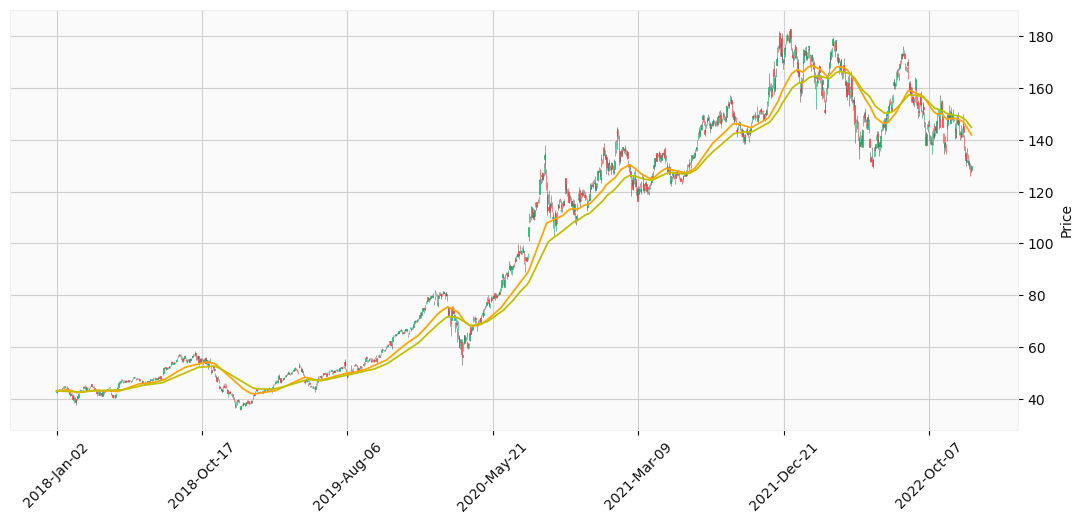

In [538]:
mpf.plot(df,style='yahoo', type='candle', addplot = sma_list, figsize=(14,6))

In [539]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long
Date,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888062,102223600,43.064999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880947,118071600,43.064731,43.064832
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070843,89738400,43.071615,43.069113
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538445,94640000,43.095843,43.084244
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384148,82271200,43.113403,43.095428
...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,143.926656,146.386326
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,143.430347,146.022852
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,142.809263,145.578789


In [540]:
df['trend'] = df['sma_short'] > df['sma_long']

In [541]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend
Date,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888062,102223600,43.064999,43.064999,False
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880947,118071600,43.064731,43.064832,False
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070843,89738400,43.071615,43.069113,True
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538445,94640000,43.095843,43.084244,True
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384148,82271200,43.113403,43.095428,True
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,143.926656,146.386326,False
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,143.430347,146.022852,False
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,142.809263,145.578789,False


In [542]:
df['trend_shift'] = df.trend.shift(1)

In [543]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift
Date,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888062,102223600,43.064999,43.064999,False,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880947,118071600,43.064731,43.064832,False,False
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070843,89738400,43.071615,43.069113,True,False
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538445,94640000,43.095843,43.084244,True,True
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384148,82271200,43.113403,43.095428,True,True
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,143.926656,146.386326,False,False
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,143.430347,146.022852,False,False
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,142.809263,145.578789,False,False


In [544]:
df.loc[(df.trend == True) & (df.trend_shift == False),'action'] = 'buy'
df.loc[(df.trend == False) & (df.trend_shift == True),'action'] = 'sell'

In [545]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action
Date,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888062,102223600,43.064999,43.064999,False,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880947,118071600,43.064731,43.064832,False,False,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070843,89738400,43.071615,43.069113,True,False,buy
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538445,94640000,43.095843,43.084244,True,True,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384148,82271200,43.113403,43.095428,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,143.926656,146.386326,False,False,NaN
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,143.430347,146.022852,False,False,NaN
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,142.809263,145.578789,False,False,NaN


In [546]:
df[df.action == 'buy']

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action
Date,,,,,,,,,,,
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070843,89738400,43.071615,43.069113,True,False,buy
2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714943,126814000,42.952045,42.951652,True,False,buy
2018-04-13,43.695000,43.959999,43.462502,43.682499,41.643448,100497200,43.037065,43.035896,True,False,buy
2018-05-07,46.294998,46.917500,46.187500,46.290001,44.129238,169805600,43.018135,43.010979,True,False,buy
2019-04-03,48.312500,49.125000,48.287498,48.837502,47.266758,93087200,44.829683,44.813769,True,False,buy
2020-04-27,70.449997,71.135002,69.987503,70.792503,69.412445,117087600,68.647521,68.643337,True,False,buy
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.553055,68039400,154.226698,154.110164,True,False,buy


In [547]:
df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] *0.95
df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] *1.05

In [548]:
df[df.marker_position.notnull()]

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070843,89738400,43.071615,43.069113,True,False,buy,40.869000
2018-02-02,41.500000,41.700001,40.025002,40.125000,38.096676,346375200,43.096428,43.114858,False,True,sell,43.785001
2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714943,126814000,42.952045,42.951652,True,False,buy,41.389126
2018-04-03,41.910000,42.187500,41.220001,42.097500,40.132427,121112000,43.026170,43.031263,False,True,sell,44.296875
2018-04-13,43.695000,43.959999,43.462502,43.682499,41.643448,100497200,43.037065,43.035896,True,False,buy,41.289376
2018-04-24,41.417500,41.582500,40.305000,40.735001,38.833538,134768000,42.962863,42.993599,False,True,sell,43.661625
2018-05-07,46.294998,46.917500,46.187500,46.290001,44.129238,169805600,43.018135,43.010979,True,False,buy,43.878125
2018-11-26,43.560001,43.737499,42.564999,43.654999,42.070515,179994000,51.320794,51.381530,False,True,sell,45.924374
2019-04-03,48.312500,49.125000,48.287498,48.837502,47.266758,93087200,44.829683,44.813769,True,False,buy,45.873124


In [549]:
b = df.loc[df.action == 'buy']

s = df.loc[df.action == 'sell']

In [550]:
b

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070843,89738400,43.071615,43.069113,True,False,buy,40.869000
2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714943,126814000,42.952045,42.951652,True,False,buy,41.389126
2018-04-13,43.695000,43.959999,43.462502,43.682499,41.643448,100497200,43.037065,43.035896,True,False,buy,41.289376
2018-05-07,46.294998,46.917500,46.187500,46.290001,44.129238,169805600,43.018135,43.010979,True,False,buy,43.878125
2019-04-03,48.312500,49.125000,48.287498,48.837502,47.266758,93087200,44.829683,44.813769,True,False,buy,45.873124
2020-04-27,70.449997,71.135002,69.987503,70.792503,69.412445,117087600,68.647521,68.643337,True,False,buy,66.488128
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.553055,68039400,154.226698,154.110164,True,False,buy,160.929994


In [551]:
s

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2018-02-02,41.500000,41.700001,40.025002,40.125000,38.096676,346375200,43.096428,43.114858,False,True,sell,43.785001
2018-04-03,41.910000,42.187500,41.220001,42.097500,40.132427,121112000,43.026170,43.031263,False,True,sell,44.296875
2018-04-24,41.417500,41.582500,40.305000,40.735001,38.833538,134768000,42.962863,42.993599,False,True,sell,43.661625
2018-11-26,43.560001,43.737499,42.564999,43.654999,42.070515,179994000,51.320794,51.381530,False,True,sell,45.924374
2020-04-02,60.084999,61.287498,59.224998,61.232498,60.038807,165934000,68.639689,68.686583,False,True,sell,64.351873
2022-05-10,155.520004,156.740005,152.929993,154.509995,153.805313,115366700,164.418131,164.436213,False,True,sell,164.577006
2022-09-30,141.279999,143.100006,138.000000,138.199997,137.760773,124925300,155.346601,155.570639,False,True,sell,150.255006


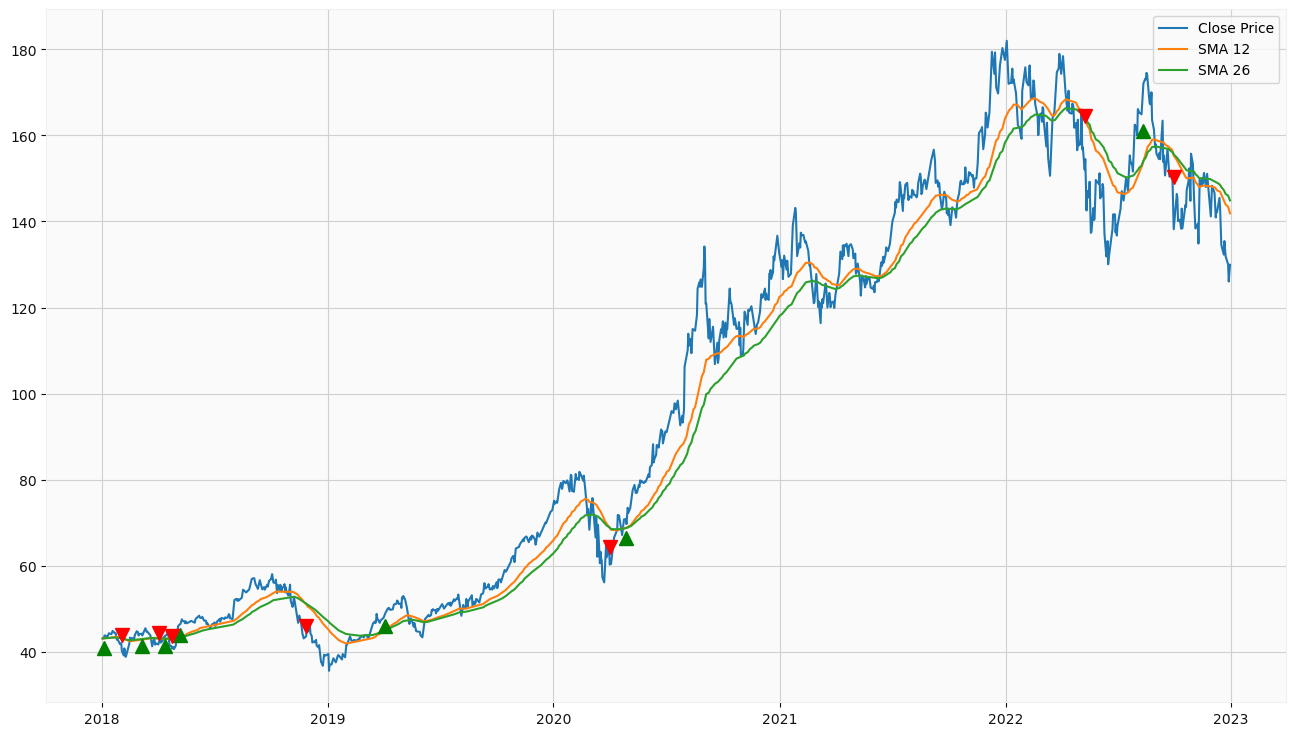

In [552]:
plt.figure(figsize=(16,9))
plt.plot(df.Close, label='Close Price')
plt.plot(df.sma_short, label='SMA 12')
plt.plot(df.sma_long, label='SMA 26')
plt.plot(b.marker_position, 'g^', markersize=10)
plt.plot(s.marker_position, 'rv', markersize=10)
plt.legend()

## Make the prediction here

In [553]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [554]:
df.dropna(subset=["sma_short","sma_long"],inplace=True)
df.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
sma_short             0
sma_long              0
trend                 0
trend_shift           1
action             1245
marker_position    1245
dtype: int64

In [555]:
X = df[["Open","High","Low","Volume","sma_short","sma_long"]]
y = df["Close"]
df.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
sma_short             0
sma_long              0
trend                 0
trend_shift           1
action             1245
marker_position    1245
dtype: int64

In [556]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2 , shuffle=False,random_state = 42)

In [557]:
model = RandomForestRegressor(n_estimators=100,random_state=0)
model.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

In [558]:
pred_y = model.predict(test_x)

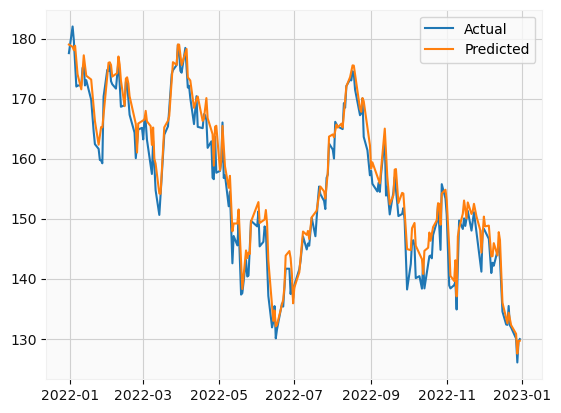

In [559]:
# Plot the predicted vs. actual stock prices
plt.plot(test_y.index, test_y.values, label='Actual')
plt.plot(test_y.index, pred_y, label='Predicted')
plt.legend()
plt.show()

In [560]:
# Calculate the Mean Squared Error (MSE) and R-squared
mse = metrics.mean_squared_error(test_y, pred_y)
r2 = metrics.r2_score(test_y, pred_y)

print(mse)
print(r2)

8.08485694711679
0.9527619441112687
